IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Jules Bourcier et Tony Gosse-Dumesnil

## Préparation

Décompresser l'archive, elle crée le répertoire "tp9" qui contient :
- un fichier ipython à ouvrir (ce fichier-ci)
- un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance
- un sous-répertoire "IADS2018" (qui contient 2 fichiers python) dont l'utilisation est détaillée un peu plus loin dans ce fichier ipython.

Le but de ce TP est de compléter ce document ipython en ajoutant les fonctions demandées. Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles 


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

### Chargement du fichier "base_2D.csv"

In [2]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5] # ou bien : data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Construction d'un package de fonctions

Dans un premier temps, afin de pouvoir utiliser toutes les fonctions écrites dans le TP précédent (fonctions pour les K-moyennes), vous allez réaliser un package de fonctions qui s'appelle "<tt>IADS2018</tt>".

Le package <tt>IADS2018</tt> est composé ainsi :
- c'est un répertoire dont le nom est <tt>IADS2018</tt>
- ce répertoire contient le fichier <tt>\__init\__.py</tt> qui, dans notre cas, est un fichier vide (mais il est important que ce fichier existe !)
- ce répertoire contient le fichier <<tt>kmoyennes.py</tt> qui est le fichier dans lequel vous devez mettre toutes les fonctions écrites lors du TP précédent sur les K-moyennes.

<font size="+1" color="RED">**[Q]**</font> En utilisant votre éditeur de texte préféré (emacs, gedit, vim,...) ouvrir le fichier <tt>kmoyennes.py</tt> qui se trouve dans le sous-répertoire <tt>IADS2018</tt> et compléter-le en reprenant les fonctions que vous avez écrites dans la séance précédente.

Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en utilisant une commande d'importation:

In [3]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
import IADS2018 
import IADS2018.kmoyennes as km

#### Vérification que tout fonctionne bien

Si la recopie de toutes vos fonctions s'est bien déroulée, une fois l'importation faite il est possible de tester les instructions des boites suivantes:

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


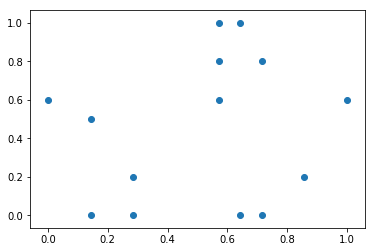

In [6]:
# Affichage des points après normalisation:

DataFnorm = km.normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

In [10]:
les_centres, l_affectation, inertie = km.kmoyennes(3, DataFnorm, 0.05, 100)

km.afficheResultat(DataFnorm,les_centres,l_affectation)

Iteration  0  Inertie :  1.04019193392  Difference :  1.9357993197278922
Iteration  1  Inertie :  1.04019193392  Difference :  0.0


AttributeError: module 'IADS2018.kmoyennes' has no attribute 'afficheResultat'

## Travail à réaliser

On peut reprendre les fonctions écrites dans les tp sur l'apprentissage supervisé pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

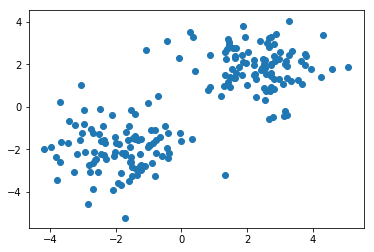

In [8]:
def createGaussianDataset(group1_center,group2_center,sigma,nb_points):
        group1 = np.random.multivariate_normal(group1_center,sigma,nb_points)
        group2 = np.random.multivariate_normal(group2_center,sigma,nb_points)
        
        return np.concatenate((group1, group2))

# Utilisation de cette fonction :
the_set = createGaussianDataset(np.array([2,2]),np.array([-2,-2]),np.array([[1.1,0],[0,1.1]]),100)

# Affichage des points obtenus
data_random = pd.DataFrame(the_set, columns = ['X', 'Y'])
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

In [9]:
print("K = 2")
les_centresRand1, l_affectationRand1, inertieRand1 = km.kmoyennes(2, DataRandom, 0.05, 100)

km.afficheResultat(DataRandom,les_centresRand1,l_affectationRand1)
print("Inertie globale : ", inertieRand1) 

K = 2
Iteration  0  Inertie :  5.05095003024  Difference :  18.811802659767828
Iteration  1  Inertie :  4.91606688587  Difference :  0.13488314436755378
Iteration  2  Inertie :  4.91606688587  Difference :  0.0


ValueError: not enough values to unpack (expected 3, got 2)

K = 3
Itération 1 inertie : 4.2007743350202364 différence : 0.0
Nombre d'itérations :  1
Inertie globale :  5.131593339456786


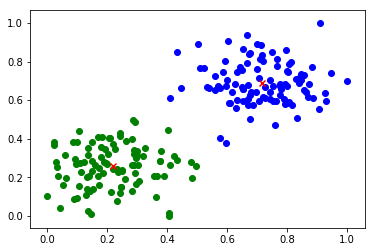

In [33]:
print("K = 3")
les_centresRand2, l_affectationRand2 , inertieRand2 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.afficheResultat(DataRandom,les_centresRand1,l_affectationRand1)
print("Inertie globale : ", inertieRand1) 

K = 4
Itération 1 inertie : 3.7434173424391806 différence : 0.6889608153349047
Itération 2 inertie : 3.40085101149611 différence : 0.34256633094307043
Itération 3 inertie : 3.273637739449017 différence : 0.1272132720470931
Itération 4 inertie : 3.238858143660787 différence : 0.0347795957882302
Nombre d'itérations :  4
Inertie globale :  5.131593339456786


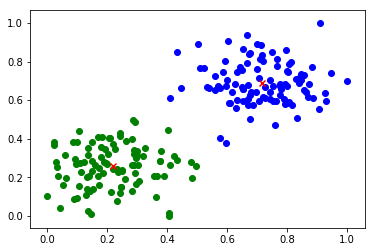

In [34]:
print("K = 4")
les_centresRand3, l_affectationRand3 , inertieRand3 = km.kmoyennes(4, DataRandom, 0.05, 100)

km.afficheResultat(DataRandom,les_centresRand1,l_affectationRand1)
print("Inertie globale : ", inertieRand1) 

K = 5
Itération 1 inertie : 3.254300005697025 différence : 0.557371512551609
Itération 2 inertie : 3.0921708521222264 différence : 0.1621291535747984
Itération 3 inertie : 3.050940907604081 différence : 0.041229944518145434
Nombre d'itérations :  3
Inertie globale :  5.131593339456786


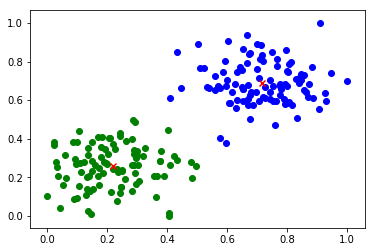

In [35]:
print("K = 5")
les_centresRand4, l_affectationRand4, inertieRand4 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.afficheResultat(DataRandom,les_centresRand1,l_affectationRand1)
print("Inertie globale : ", inertieRand1) 

K = 6
Itération 1 inertie : 2.948406597932566 différence : 0.4456793872694176
Itération 2 inertie : 2.714764045540274 différence : 0.23364255239229204
Itération 3 inertie : 2.674593587981584 différence : 0.040170457558689865
Nombre d'itérations :  3
Inertie globale :  5.131593339456786


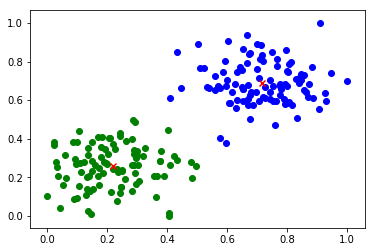

In [36]:
print("K = 6")
les_centresRand5, l_affectationRand5, inertieRand5 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.afficheResultat(DataRandom,les_centresRand1,l_affectationRand1)
print("Inertie globale : ", inertieRand1) 

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [37]:
def distIntracluster(cluster):
    
    distmax = -1.0
    for i in range(0, len(cluster)):
        for j in range(0, len(cluster)):
            if i != j:
                dist = km.distVect(cluster.iloc[i], cluster.iloc[j])
                if dist > distmax:
                    distmax = dist
    return distmax

In [38]:
# Avec les données jouet:
for k in range(0,len(l_affectation)):
    DF = DataFnorm.iloc[l_affectation[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertieCluster(DF)) + "\tdistance = "+  str(distIntracluster(DF)))


pour 0 : inertie = 0.36914285714285705	distance = 0.6645544771207432
pour 1 : inertie = 0.12832653061224492	distance = 0.40632750438079696
pour 2 : inertie = 0.3152551020408163	distance = 0.6982485377057106


In [39]:
# Avec les données générées aléatoirement:
for k in range(0,len(l_affectation)):
    DF = DataRandom.iloc[l_affectationRand2[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertieCluster(DF)) + "\tdistance = "+  str(distIntracluster(DF)))


pour 0 : inertie = 0.9163796471295997	distance = 0.6972448684304439
pour 1 : inertie = 0.7824260857937704	distance = 0.45895455558433773
pour 2 : inertie = 2.501968602096866	distance = 0.5429599844663635


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [40]:
def globalIntraclusters(dfTrain, matrice):
    
    vmax = -1.0
    for key, indexes in matrice.items():
        
        cluster = dfTrain.iloc[indexes]
        value = distIntracluster(cluster)
        if value > vmax:
            vmax = value
    return value

In [42]:
# Exemples:
print("Avec la compacité intra-cluster : ")
print("Données jouet: "+str(globalIntraclusters(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(globalIntraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertieGlobale(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertieGlobale(DataRandom,l_affectationRand2)))


Avec la compacité intra-cluster : 
Données jouet: 0.6982485377057106
Données aléatoire: 0.5429599844663635
Avec l'inertie :
Données jouet: 0.8127244897959183
Données aléatoire: 4.2007743350202364


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [47]:
def sepClusters(centroids):
    
    dmin = float('inf')
    for i in range(0, len(centroids)):
        for j in range(0, len(centroids)):
            if i != j:
                dist = km.distVect(centroids.iloc[i], centroids.iloc[j])
                if dist < dmin:
                    dmin = dist
    return dmin

In [48]:
# Avec les données jouet:
print("Séparabilité: "+str(sepClusters(les_centres)))


Séparabilité: 0.6349839303767731


In [50]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sepClusters(les_centresRand2)))


Séparabilité: 0.19246310981564718


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [53]:
def evaluation(indexName, dfTrain, centroids, matrice):
    
    if indexName == "Dunn":
        return globalIntraclusters(dfTrain, matrice) / sepClusters(centroids)
    if indexName == "XB":
        return km.inertieGlobale(dfTrain, matrice) / sepClusters(centroids)
    else:
        print("Index inconnu")

In [54]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",DataFnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",DataFnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand5,l_affectationRand5)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand5,l_affectationRand5)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand4,l_affectationRand4)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand4,l_affectationRand4)))


Pour les données jouet:
	Dunn:	1.0996318242123055
	XB:	1.2799134764145625
Pour les données aléatoires (6 clusters):
	Dunn:	2.6515173585390293
	XB:	16.18998927576346
Pour les données aléatoires (5 clusters):
	Dunn:	2.2440496053487022
	XB:	16.97901943009911


## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

In [67]:
indexDunn = []
indexXB = []
ks = list(range(2, 11))

for k in ks:
    les_centres, l_affectation, inertie = km.kmoyennes(k, DataRandom, 0.01, 100, False)
    indexDunn.append(evaluation("Dunn", DataRandom, les_centres, l_affectation))
    indexXB.append(evaluation("XB", DataRandom, les_centres, l_affectation))

Text(0.5,1,'Index de Xie et Beni')

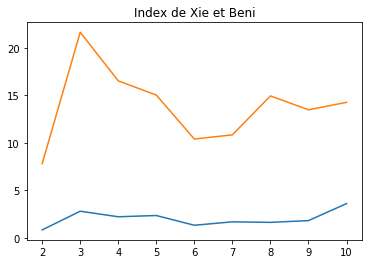

In [66]:
plt.plot(ks, indexDunn)
plt.title("Index de Dunn / Xie et Beni")
plt.plot(ks, indexXB)
plt.show()
#TODO legend

On constate que sur le dataset composé de 2 centres, le meilleur clustering est pour K = 2

On test l'évaluation de l'algoritme sur d'autres données

Données de test :


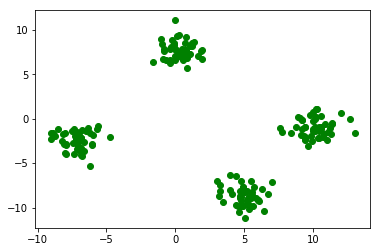

In [80]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=200, n_features=2, centers=4)

plt.scatter(X[:,0],X[:,1],color='g')
print ("Données de test :")
plt.show()
dfTest = pd.DataFrame(X, columns=['X','Y'])

 K =  2
Inertie globale : 9342.293474632672


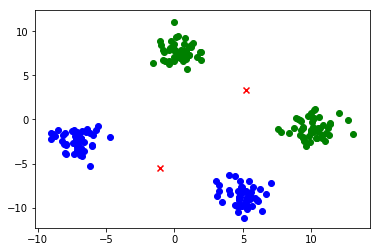

 K =  3
Inertie globale : 2487.064497116675


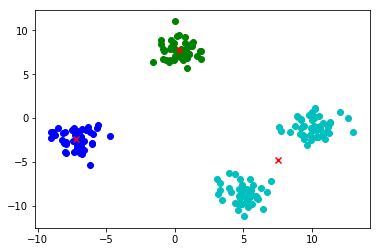

 K =  4
Inertie globale : 366.4709905363171


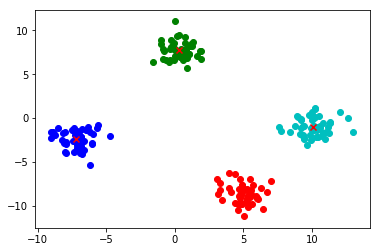

 K =  5
Inertie globale : 338.056849665244


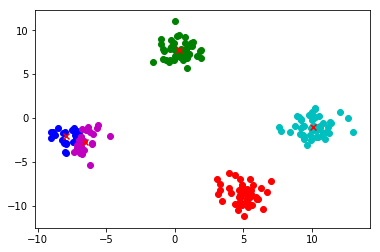

 K =  6
Inertie globale : 305.96107216210504


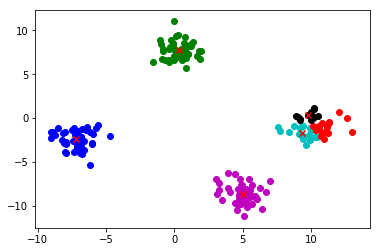

 K =  7
Inertie globale : 324.38180209011495


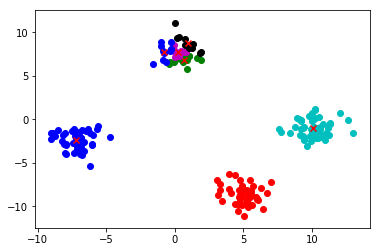

 K =  8
Inertie globale : 258.0550803211409


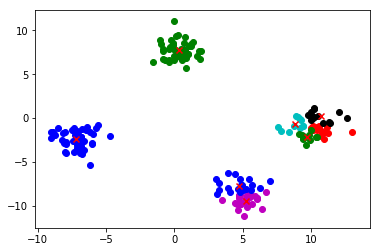

 K =  9
Inertie globale : 226.94348228097138


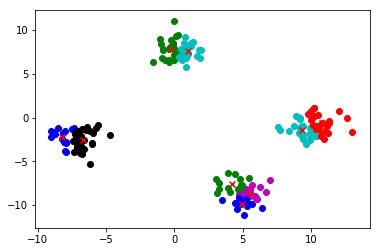

 K =  10
Inertie globale : 221.66331493666382


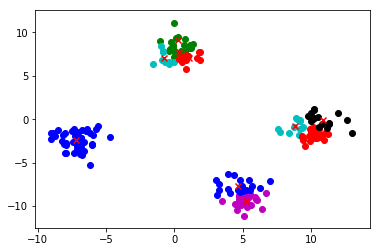

In [86]:
indexDunn = []
indexXB = []
for k in list(range(2, 11)):
    
    print(" K = ", k)
    les_centres, l_affectation, inertie = km.kmoyennes(k, dfTest, 0.05, 100, False)
    km.afficheResultat(dfTest, les_centres, l_affectation)
    plt.show()
    indexDunn.append(evaluation("Dunn", dfTest, les_centres, l_affectation))
    indexXB.append(evaluation("XB", dfTest, les_centres, l_affectation))

Text(0.5,1,'Index de Dunn / Xie et Benie')

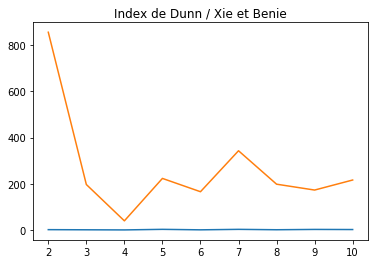

In [87]:
plt.plot(ks, indexDunn)
plt.plot(ks, indexXB)
plt.title("Index de Dunn / Xie et Benie")
plt.show()

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/

In [96]:
dataParis = pd.read_csv("data/base-Paris.csv", sep=';')
arrd = dataParis['Granularité'].copy()
del dataParis['Granularité']
del dataParis['Total arrondissement 2011']

#convertir string en float
for i, row in dataParis.iterrows():
    for cl in dataParis.columns:
        row[cl] = row[cl].replace(' ', '')
        row[cl] = row[cl].replace(',','.')
        row[cl] = float(row[cl])
dataParis

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5
7,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [98]:
indexDunn = []
indexXB = []
tabCentresMatrices = []
for k in list(range(2, 22)):
    
    print(" K = ", k)
    les_centres, l_affectation, inertie = km.kmoyennes(k, dataParis, 0.05, 100, False)
    
    tabCentresMatrices.append((les_centres, l_affectation))
    indexDunn.append(evaluation("Dunn", dataParis, les_centres, l_affectation))
    indexXB.append(evaluation("XB", dataParis, les_centres, l_affectation))


 K =  2
 K =  3
 K =  4
 K =  5
 K =  6
 K =  7
 K =  8
 K =  9
 K =  10
 K =  11
 K =  12
 K =  13
 K =  14
 K =  15
 K =  16
 K =  17
 K =  18
 K =  19
 K =  20
 K =  21


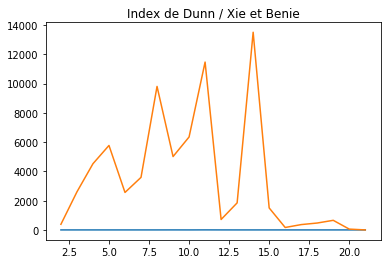

[-4.4177843971593974e-05, -0.0009192246976114422, -0.0019802732565690527, -0.002893458008581575, -0.0034035159704429224, -0.0049520472068748074, -0.013370570226926457, 1.0748140589329505, -0.010120247147751766, 2.5376239987400657, 0.720724948782243, -0.022511733781772476, -0.022511733781772476, -0.022511733781772476, -0.013370570226926457, -0.014276961403705508, -0.01859217877763434, -0.022511733781772476, -0.022511733781772476, -0.022511733781772476]


In [102]:
ks = list(range(2, 22))
plt.plot(ks, indexDunn)
plt.plot(ks, indexXB)
plt.title("Index de Dunn / Xie et Benie")
plt.show()
print(indexDunn)

In [ ]:
#TODO
#Analyser les résultats
#Mettre en relation avec les arrondissements
#Blablabla